#### Applied Machine Learning - Mini Project 1 (Tasnim Ahmed, ta1743)

## Linear Regression

### Exploring the data

In [3]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [5]:
from sklearn.datasets import load_boston

In [6]:
## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     boston = load_boston()

In [7]:
# Extracting the data in a dataframe for readability
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) 

Based on the information below we can tell that there no non-empty cells, thus, we  don't need to pre-process the data to fix any empty cells

In [8]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
df_boston.head()  #prints out the first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Below we label the targer variable (y) as 'PRICE' because this is what we will be predicting in our models later for the testing data set

In [10]:
df_boston['PRICE'] = boston.target   

In [11]:
df_boston.head()  #checking the dataset after adding the target label

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The table below gives the statistics(mean, median and five-number summary) of all the features of our chosen dataset

In [12]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Splitting Data: Training and Test Sets

Before starting with implementing and testing our models we need to split our data into training and testing sets. We split them because the training sets are used to estimte the parameters of the model and then we implement those parameters on our testing set to check if our model works correctly or not. 

Below we are separating the independent variables and dependent variables into X and y because functions as an input value whereas y is the output value. 

In [9]:
X = df_boston.drop('PRICE', axis = 'columns') #independent variables
y = df_boston['PRICE']  #dependent variable

KeyError: "['PRICE'] not found in axis"

<img src="https://ichef.bbci.co.uk/images/ic/1200xn/p0cx7wkx.png" alt="linear regression foundation" style="height: 200px;"/>

Below we appending ones to the matrix of independendent variable, because the 1s are the bias feature of 
each observation.

In [ ]:
X = np.append(arr = np.ones([X.shape[0], 1]).astype(int), values = X, axis= 1)
X.shape #adding the 1s to our X increases the size of our columns by 1

For the linear regression models the KFold splitting technique is implemented because this techniques results in a less biased model compare to other methods. KFold ensures that every observation from the original dataset has the chance of appearing in training and test set. 

In [10]:
from sklearn.model_selection import KFold
kfold_value = 5
kfold = KFold(n_splits = kfold_value)

### Error Calculation: Mean Squared Error (MSE)

<img src="https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG" alt="linear regression foundation" style="height: 100px;"/>

For the linear regression models we compare the models based on the MSE values, which is the averages squared difference between the estimates values and the actual value. 

### *Closed form solution*

The simplest form of linear regression model is the closed form solution model. We can obtain the optimal parameters by using the normal equation, which is derived by taking the derivate of the linear regression equation with respect to the parameters (theta/weight) and setting it to zero and making theta the subject of the equation. 

<img src="https://media.geeksforgeeks.org/wp-content/uploads/Untitled-drawing-1-10.png" alt="linear regression foundation" style="height: 150px;"/>

In [17]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [18]:
mse_train_arr = []    # An array that stores the value of training set mse of the 5 iterations of the kfolds
mse_test_arr = []     # An array that stores the value of testing set mse of the 5 iterations of the kfolds
for train, test in kfold.split(X):
    X_train, X_test = X[train], X[test]    # splitting the X into training and test based on the indices
    y_train, y_test = y[train], y[test]    # splitting the y into training and test based on the indices
    
    theta = normal_equation(X_train, y_train)    # getting the optimal theta with the normal equation
    
    y_train_pred = np.dot(X_train,theta)       # predicting the training set values with the optimal theta
    mse_train = sum((y_train_pred - y_train)**2)/len(y_train)   # calculating the mse of the predicted values
    mse_train_arr.append(mse_train)           # at each fold the mse values are appended to the array
    
    y_test_pred = np.dot(X_test,theta)         # predicting the training set values with the optimal theta
    mse_test = sum((y_test_pred - y_test)**2)/len(y_test)     # calculating the mse of the predicted values
    mse_test_arr.append(mse_test)            # at each kfold the mse values are appended to the array


avg_train_closed = np.mean(mse_train_arr)  # taking the average of the training mse values of each fold
avg_test_closed = np.mean(mse_test_arr)    # taking the average of the testing mse values of each fold
print("Closed Form MSE Values")
print("Average training RMSE:", avg_train_closed)
print("Average testing RMSE:", avg_test_closed)

Closed Form MSE Values
Average training RMSE: 20.735084629886188
Average testing RMSE: 37.131807467699446


### *Ridge Regression*

Ridge regression is a model tuning method that is used to work on data that suffers from multicollinearity. s a statistical concept where several independent variables in a model are correlated and such is the case for our dataset. Thus, the ridge regression closed form equation adds a regularization term to control the magnitude of the coefficients. 

<img src="https://vitalflux.com/wp-content/uploads/2022/04/Ridge-regression-cost-function-2.png" alt="linear regression foundation" style="height: 250px;"/>

λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced.

In [19]:
def ridge_regression_theta(X, y, alpha):
    I = np.identity(X.shape[1])
    I[0][0] = 0  
    theta = np.linalg.inv(X.T.dot(X) + alpha*I).dot(X.T).dot(y)
    return theta

The function below is used by 2 models: Ridge Regression Closed Form and Polynomial Feature Model

The function below uses the ridge regression closed equation to get the optimal theta, which is then used to predict the y values of the training and the testing. The predicted values are then compared with the actual values with the MSE formula. The average of the MSE is returned, since the MSE value if calculated over the given number of folds. 

In [21]:
def ridge_regression_model(X, y, alpha, kfold_value):
    
    mse_train_arr = []   # An array that stores the value of training set mse of the iterations of the kfolds
    mse_test_arr = []    # An array that stores the value of testing set mse of the 5 iterations of the kfolds
    
    kfold = KFold(n_splits = kfold_value)
    for train, test in kfold.split(X):
            X_train, X_test = X[train], X[test]    # splitting the X into train and test based on the indices
            y_train, y_test = y[train], y[test]    # splitting the y into train and test based on the indices

            theta = ridge_regression_theta(X_train, y_train, alpha) # getting the optimal theta with the ridge normal equation

            y_train_pred = np.dot(X_train,theta)   # predicting the training set values with the optimal theta
            mse_train = sum((y_train_pred - y_train)**2)/len(y_train) # calculating the mse of the predicted values
            mse_train_arr.append(mse_train)      # at each fold the mse values are appended to the array

            y_test_pred = np.dot(X_test,theta)     # predicting the testing set values with the optimal theta
            mse_test = sum((y_test_pred - y_test)**2)/len(y_test) # calculating the mse of the predicted values
            mse_test_arr.append(mse_test)        # at each fold the mse values are appended to the array
            
    return [np.mean(mse_train_arr),np.mean(mse_test_arr)]   #returning the average mse of all the values stored in each fold

In [23]:
alphas = np.logspace(1,7,num=13)   # array that has all the lamba/alpha values that controls the penalty term

print("Ridge Regression Closed Form MSE Values", "\n")

kfold_value = 10   # for ridge regression we create 10 fold for splitting the data into training and testing sets
for i in range(len(alphas)): #iterations over all the alpha values in the array
    mse = ridge_regression_model(X, y, alphas[i], kfold_value) # calls the ridge regression function to get mse for each alpha
    print("For alpha =", alphas[i], "MSE train =", mse[0], "and MSE test =", mse[1])

Ridge Regression Closed Form MSE Values 

For alpha = 10.0 MSE train = 22.233497098506415 and MSE test = 33.00581779365572
For alpha = 31.622776601683793 MSE train = 22.646664882622368 and MSE test = 31.31644662630067
For alpha = 100.0 MSE train = 23.609927954690335 and MSE test = 29.615220097335122
For alpha = 316.22776601683796 MSE train = 25.37477599577732 and MSE test = 29.799581632087712
For alpha = 1000.0 MSE train = 27.757850173242883 and MSE test = 32.079625300307
For alpha = 3162.2776601683795 MSE train = 31.248743716769876 and MSE test = 36.39681833044761
For alpha = 10000.0 MSE train = 37.18780782673681 and MSE test = 43.49654119663741
For alpha = 31622.776601683792 MSE train = 46.06017879697656 and MSE test = 53.06436386051123
For alpha = 100000.0 MSE train = 53.761145655011774 and MSE test = 60.55406028295456
For alpha = 316227.7660168379 MSE train = 58.309269724671616 and MSE test = 64.65441014932233
For alpha = 1000000.0 MSE train = 61.18118612491925 and MSE test = 67.38

The best value part amongst all the alphas is the value given by alpha = 100

In [24]:
alpha_ridge = alphas[2]   #the best alpha was chosen by checking which gave the least MSE of testing set
rr_mse = ridge_regression_model(X, y, alpha_ridge, kfold_value) 
print("For alpha =", alpha_ridge, "MSE train =", rr_mse[0], "and MSE test =", rr_mse[1], "\n")

For alpha = 100.0 MSE train = 23.609927954690335 and MSE test = 29.615220097335122 



### *Polynomial Transformation*

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png" alt="linear regression foundation" style="height: 250px;"/>

In polynomial transformation model is a type of feature engineering that is done by creating new input features based on the already existing features. By generating polynomial features, we can uncover potential new relationships between the features and the target and improve the model's performance. 

In [25]:
from sklearn.preprocessing import PolynomialFeatures  # importing the skelpolymomial features 

X_new = df_boston.drop('PRICE', axis = 'columns') #independent variables (creating again to remove the bias term)
polynomial_converter = PolynomialFeatures(degree=2)

The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 2 will add one new variables for each input variable.

In [26]:
poly_features = polynomial_converter.fit_transform(X_new) # independent variables after polynomial transformation
poly_features.shape   # the number of feature increases with the addiiton of polynomial features

(506, 105)

Even for polynomial transformation model we use the ridge regression closed form equation to find the optimal theta. Because the number of features has increased, thus, we still have the issue of multicollinearity 

In [28]:
print("Polynomial Feature MSE Values", "\n")

poly_kfold_value = 10 # for ridge regression we create 10 fold for splitting the data into training and testing sets
for i in range(len(alphas)): # iterate over all the values of alpha that was declared earlier
    # calls the ridge regression function to get mse for each alpha
    mse = ridge_regression_model(poly_features, y, alphas[i], poly_kfold_value) 
    print("For alpha =", alphas[i], "MSE train =", mse[0], "and MSE test =", mse[1])

Polynomial Feature MSE Values 

For alpha = 10.0 MSE train = 6.588341672438196 and MSE test = 59.52508999693248
For alpha = 31.622776601683793 MSE train = 7.0171020195134926 and MSE test = 61.41648539887863
For alpha = 100.0 MSE train = 7.481646104649838 and MSE test = 65.55557807515319
For alpha = 316.22776601683796 MSE train = 7.914053076924398 and MSE test = 70.36686130408066
For alpha = 1000.0 MSE train = 8.387386360419693 and MSE test = 71.78516200647466
For alpha = 3162.2776601683795 MSE train = 8.953319864238308 and MSE test = 68.6881547247963
For alpha = 10000.0 MSE train = 9.51761867834638 and MSE test = 62.86987074418263
For alpha = 31622.776601683792 MSE train = 10.093060417761679 and MSE test = 55.99478374454818
For alpha = 100000.0 MSE train = 10.756066634404032 and MSE test = 48.22101981108817
For alpha = 316227.7660168379 MSE train = 11.502928036371761 and MSE test = 38.595444435393986
For alpha = 1000000.0 MSE train = 12.747525283996191 and MSE test = 30.068171402220532

In [29]:
alpha_poly = alphas[10] #the best alpha was chosen by checking which gave the least MSE test
poly_mse = ridge_regression_model(poly_features, y, alpha_poly, poly_kfold_value)
print("For alpha =", alpha_poly, "MSE train =", poly_mse[0], "and MSE test =", poly_mse[1], "\n")

For alpha = 1000000.0 MSE train = 12.747525283996191 and MSE test = 30.068171402220532 



### *Gradient Descent*

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning1.png" alt="linear regression foundation" style="height: 250px;"/>

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function, which will minimize a cost function as far as possible. The differentiable function here is the loss function. 

In gradient descent we randomly initialize the parameters (theta) and then iteratively reach the local/global minima of the derivative of the loss function

For gradient descent models we scale the data to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features. 

In [13]:
from sklearn.preprocessing import StandardScaler  
X_wb = df_boston.drop('PRICE', axis = 'columns') #independent variables - doing again to remove the bias term
X_wb = X_wb.to_numpy()   #converting the dataframe to numpy array

The function below is used by 4 gradient descent models: Batch DG, GD with Ridge Regularization, GD with Lasso Regularization and GD with Elastic Regularization

In [12]:
kfold_value = 5  # using 5 folds to split the data
kfold = KFold(n_splits = kfold_value)

def gradient_descent_mse(X, y, model_name):
    mse_train_arr = []  # An array that stores the value of training set mse of the iterations of the kfolds
    mse_test_arr = []   # An array that stores the value of testing set mse of the iterations of the kfolds
    
    for train, test in kfold.split(X):
        X_train, X_test = X[train], X[test]   # splitting the X into train and test based on the indices
        y_train, y_test = y[train], y[test]   # splitting the y into train and test based on the indices
    
        #Initiliazing the parameters
        learning_rate = 0.1           # the learning rate
        n_iterations = 1000           # number of iterations of gradient descent for finding the minima
    
        # Scaling the training data  
        # the data is transformed without the bias because if bias is added then it become zero
        sc = StandardScaler()
        X_tr_transform = sc.fit_transform(X_train)
        # adding the bias feature
        X_tr_transform = np.append(arr = np.ones([X_tr_transform.shape[0], 1]).astype(int), values = X_tr_transform, axis= 1)
    
        theta = np.random.randn(X_tr_transform.shape[1])  # initiaiting with randomized parameters
        
        
        # getting the optimal theta with the appropriate based on the given model_name
        if model_name == "gradient_descent":
            theta = gd_theta(X_tr_transform , y_train, theta, learning_rate, n_iterations)
        elif model_name == "ridge_gradient":
            theta = gd_ridge_theta(X_tr_transform , y_train, theta, learning_rate, n_iterations)
        elif model_name == "lasso_gradient":
            theta = gd_lasso_theta(X_tr_transform , y_train, theta, learning_rate, n_iterations)
        elif model_name == "elastic_gradient":
            theta = gd_elastic_theta(X_tr_transform , y_train, theta, learning_rate, n_iterations)
            

        y_train_pred = np.dot(X_tr_transform,theta) # predicting the training set values with the optimal theta
        mse_train = sum((y_train_pred - y_train)**2)/len(y_train) # calculating the mse of the predicted values
        mse_train_arr.append(mse_train) # at each fold the mse values are appended to the array
        
        # Scaling the testing data  
        X_t_transform = sc.transform(X_test)
        X_t_transform = np.append(arr = np.ones([X_t_transform.shape[0], 1]).astype(int), values = X_t_transform, axis= 1)

        y_test_pred = np.dot(X_t_transform,theta)  # predicting the testing set values with the optimal theta
        mse_test = sum((y_test_pred - y_test)**2)/len(y_test) # calculating the mse of the predicted values
        mse_test_arr.append(mse_test) # at each fold the mse values are appended to the array
        
    avg_train = np.mean(mse_train_arr)
    avg_test = np.mean(mse_test_arr)   
    return [np.mean(mse_train_arr), np.mean(mse_test_arr)] #returning the average mse of all the values stored in each fold

### *Batch Gradient Descent*

<img src="https://www.oreilly.com/api/v2/epubs/9781491962282/files/assets/eq_29.png" alt="linear regression foundation" style="height: 150px;"/>

Batch gradient descent finds the optimal paramaters for all the features at ones instead of finding them individually

In [35]:
#batch gradient descent function
def gd_theta(X, y, theta, lrate, n_iter):
    for i in range(n_iter):   # iterating over the given number of iterations
        gradient = (2/len(X))*(X.T.dot(X.dot(theta) - y))   # the coded version of the above formula
        theta = theta - lrate*gradient  #updating the theta at each iteration
    return theta   #returning the optimal theta

In [36]:
average_mse = gradient_descent_mse(X_wb, y, "gradient_descent")
print("MSE train =", average_mse[0], "and MSE test =", average_mse[1], "\n")  #printing the training and test MSE values

MSE train = 20.735084633315125 and MSE test = 37.13201479719004 



In the following models we implement gradient descent with regularization because regularization minimizes the validation loss and tries to improve the accuracy of the model.

### *Gradient Descent with Ridge Regularization*

In this model we add the l2 penalty regularization, same as the earlier ridge regression model 

In [2]:
#ridge gradient
def ridge_gradient(X, y, y_pred, theta, alpha):
    ridge_gr = -(2/len(y)) * X.T.dot(y - y_pred) + alpha*theta  # the coded formula for ridge regularization
    return ridge_gr

#gradient descent function with ridge gradient
def gd_ridge_theta(X, y, theta, lrate, n_iter):
    for i in range(n_iter):
        y_predicted = np.dot(X,theta)  # predicting the y values with the given/updated theta
        gradient = ridge_gradient(X, y, y_predicted, theta, 0.0001)  # the gradient is caculated with ridge regularization
        theta = theta - lrate*gradient  # updating the theta at each iteration
    return theta   # returning the optimal theta

In [13]:
average_mse_ridge = gradient_descent_mse(X_wb, y, "ridge_gradient")
print("MSE train =", average_mse_ridge[0], "and MSE test =", average_mse_ridge[1]) #printing the training and test MSE values

NameError: name 'X_wb' is not defined

### *Gradient Descent with Lasso Regression*

Lasso is short for Least Absolute Shrinkage and Selection Operator. 

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/01/eq8-1.png" alt="linear regression foundation" style="height: 150px;"/>

Same as ridge regularization but the penalty term is l1 regularization instead of l2. This model uses shrinkage, where data values are shrunk towards a central point as the mean. 

In [39]:
#lasso gradient
def lasso_gradient(X, y, y_pred, theta):
    lasso_gr = -(2/len(y)) * X.T.dot(y - y_pred) + 0.0001*np.sign(theta) #lasso regulariozation formula
    return lasso_gr    # return the gradient value with lasso regularization

#gradient descent function with lasso gradient
def gd_lasso_theta(X, y, theta, lrate, n_iter):
    for i in range(n_iter):  #iterate over the given number of iterations
        y_predicted = np.dot(X,theta)   # predict the y value with given theta 
        gradient = lasso_gradient(X, y, y_predicted, theta)  # gradient with lasso regularization
        theta = theta - lrate*gradient  # updating the theta at each iteration
    return theta

In [40]:
average_mse_lasso = gradient_descent_mse(X_wb, y, "lasso_gradient")
print("MSE train =", average_mse_lasso[0], "and MSE test =", average_mse_lasso[1]) #print the test and train MSE values

MSE train = 20.735084807453443 and MSE test = 37.13017094207288


### *Gradient Descent with Elastic Net*

Elastic Net is a combination of ridge (l2) and lasso regularization (l1).

<img src="https://learnerjoy.com/wp-content/uploads/2021/12/image-33.png" alt="linear regression foundation" style="height: 150px;"/>

In [41]:
#elastic gradient
def elastic_gradient(X, y, y_pred, theta, alpha):
    #gradient with elastic net regularization
    elastic_gd = -(2/len(y)) * X.T.dot(y - y_pred) + alpha*theta + 0.0001*np.sign(theta)    
    return elastic_gd  #return the gradient

#gradient descent function with ridge gradient
def gd_elastic_theta(X, y, theta, lrate, n_iter):
    for i in range(n_iter):
        y_predicted = np.dot(X,theta)  #predict the values of y with given theta
        gradient = elastic_gradient(X, y, y_predicted, theta, 0.0001)  # update the gradient at each iteration
        theta = theta - lrate*gradient  #update the theta with the updated theta
    return theta  #return the optimal theta

In [42]:
average_mse_elastic = gradient_descent_mse(X_wb, y, "elastic_gradient")
print("MSE train =", average_mse_elastic[0], "and MSE test =", average_mse_elastic[1]) #print the training and testing MSE

MSE train = 20.73508754207898 and MSE test = 37.125150486140306


### Which model will is the best and why?

Our target is here to compare the MSE values of all the models and find the model with the least testing MSE value. Because the model with the least MSE value tells us that the model predicted the values of the testing with less error

In [43]:
print("Closed Form:")
print("Average training RMSE:", avg_train_closed, "Average testing RMSE:", avg_test_closed, "\n")
print("Ridge Regression")
print("For alpha =", alpha_ridge, "MSE train =", rr_mse[0], "and MSE test =", rr_mse[1], "\n")
print("Polynomial Ridge Regression")
print("For alpha =", alpha_poly, "MSE train =", poly_mse[0], "and MSE test =", poly_mse[1], "\n")
print("Gradient Descent")
print("MSE train =", average_mse[0], "and MSE test =", average_mse[1], "\n")
print("Gradient Descent with Ridge Regularization")
print("MSE train =", average_mse_ridge[0], "and MSE test =", average_mse_ridge[1], "\n")
print("Gradient Descent with Lasso Regularization")
print("MSE train =", average_mse_lasso[0], "and MSE test =", average_mse_lasso[1], "\n")
print("Gradient Descent with Elastic Regularization")
print("MSE train =", average_mse_elastic[0], "and MSE test =", average_mse_elastic[1], "\n")

Closed Form:
Average training RMSE: 20.735084629886188 Average testing RMSE: 37.131807467699446 

Ridge Regression
For alpha = 100.0 MSE train = 23.609927954690335 and MSE test = 29.615220097335122 

Polynomial Ridge Regression
For alpha = 1000000.0 MSE train = 12.747525283996191 and MSE test = 30.068171402220532 

Gradient Descent
MSE train = 20.735084633315125 and MSE test = 37.13201479719004 

Gradient Descent with Ridge Regularization
MSE train = 20.735086620270124 and MSE test = 37.12684732537699 

Gradient Descent with Lasso Regularization
MSE train = 20.735084807453443 and MSE test = 37.13017094207288 

Gradient Descent with Elastic Regularization
MSE train = 20.73508754207898 and MSE test = 37.125150486140306 



From the values above we can tell that <b> Ridge Regression </b> with <b>alpha = 100</b>  is the best model.

In [46]:
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


From the data presented above we can see that see there are multiple correlations amongst the features of our dataset. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

Given the fact that our model is multicollinear, ridge regression is best the suited model because it adds a penalizing term that enhances the least square estimate and prevents the model from overfitting. 

## Logistic Regression 

Logistic Regression model is similar to linear regression model, but instead of predicting continous numerical values it converts a real number to a binary value based on probabilty. Thus, it is a model used for binary classification model.

### Exploring the data

In [14]:
from sklearn.datasets import load_breast_cancer  # we will be working with breast cancer dataset

In [15]:
data_cancer = load_breast_cancer()          #load the data 
df_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names) #extracting the data in a dataframe for readability

By looking at the shape of the dataframe we can tell that there are 569 rows and 30 columns, which means that there are 569 datapoints and 30 features in this dataset that are printed below

In [16]:
df_cancer.shape

(569, 30)

In [17]:
df_cancer['TARGET'] = data_cancer.target   # setting our target (dependent) variable

In [18]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
X_cancer = df_cancer.drop('TARGET', axis = 'columns') #independent variables
y_cancer = df_cancer['TARGET']  #dependent variable

### Train Test Split & Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  #importing a different splitting technique

In this section, instead of KFold split we will be usin train_test_split to split our data because we are working with only one model

In [21]:
# Splitting the data into training and testing set
# 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 10, test_size = 0.2)
y_test = y_test.to_numpy()

Logistic Regression used gradient descent/ascent method,thus, we scale the data to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features. 

In [22]:
# Scaling the training data
sc_cancer = StandardScaler()
X_train_tr = sc_cancer.fit_transform(X_train)
# Adding the bias feature
X_train_tr = np.append(arr = np.ones([X_train_tr.shape[0], 1]).astype(int), values = X_train_tr, axis= 1)

In [23]:
# Scaling the testing data
X_test_tr = sc_cancer.transform(X_test)
# Adding the bias feature
X_test_tr = np.append(arr = np.ones([X_test_tr.shape[0], 1]).astype(int), values = X_test_tr, axis= 1)

### Implementation

1. Find the optimal theta using gradient descent
2. Use the optimal theta to calculate y values
3. Then use the sigmoid function to calculate the probability of y being 0 or 1 by mapping the real y values to any values between 0 and 1
4. Predict y: Use the threshold to classify y as 0 or 1 based on the sigmoid function output

The Sigmoid Function is an activation function that maps any real value to 0 and 1

<img src="https://qph.cf2.quoracdn.net/main-qimg-6b67bea3311c3429bfb34b6b1737fe0c-lq" alt="logistic regression sigmoid" style="height: 250px;"/>

In [24]:
def sigmoid_function(y_pred):
    sigmoid = 1/(1+np.exp(-y_pred))
    return sigmoid

The cost function we use in logistic regression is called log loss. We use log loss instead of MSE because in logtic regression we are dealing with binary data. 

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*JmuotVGWJCMR54f0Xh04GQ.png" alt="logistic regression sigmoid" style="height: 350px;"/>

In [25]:
def log_likelihood(theta, X , y):                                                
    y_probability = sigmoid_function(np.dot(X,theta))         # get the probabilites of y
    prob_one_log = y * np.log(y_probability)                  # the cost of y_pred when y = 1
    prob_zero_log = (1 - y) * np.log(1 - y_probability)       # the cost of y_pred when y = 0
    log_likelihood = prob_one_log + prob_zero_log
    return np.mean(log_likelihood)      #return the calculated log_likelihood value

#### *Logistic Regression Gradient Descent*

In [26]:
# logistic_gradient_desent returns the gradient value for a given theta
def logistic_gradient_descent(X, y, theta):
    y_probability = sigmoid_function(np.dot(X,theta))  # get the probability of y being 0 or 1 using the sigmoid
    gradient = (1/len(X)) * np.dot(X.T, (y_probability - y)) #calculate the gradient value
    return gradient   #return the gradient

def logistic_regression_theta(learning_rate, iterations, X_train, y_train, X_test, y_test):
    theta = np.random.randn(X_train.shape[1])  #randmize the initial theta
    log_likelihood_train = []   # Array to store training objective function values (QS 6)
    log_likelihood_test = []   # Array to store testing objective function values (QS 6)

    for i in range(iterations):  #iterate over the given iteration value to find the optimal theta
        gradient = logistic_gradient_descent(X_train, y_train, theta)   # call the gradient function
        theta = theta - learning_rate*gradient  #update the theta at each iteration
        
        likelihood_train = 0
        likelihood_test = 0
        if i%100 == 0:  #calculate the log likelihood value at each 100th iteration (QS 6)
            likelihood_train = log_likelihood(theta, X_train, y_train) #calculte the log likelihood training value
            log_likelihood_train.append(likelihood_train)    
            
            likelihood_test = log_likelihood(theta, X_test, y_test)  #calculte the log likelihood testing value
            log_likelihood_test.append(likelihood_test)
            
            
    return [theta, log_likelihood_train, log_likelihood_test]  #return the optimal theta and the log-likelihood vals

In [27]:
#ignore warning
np.seterr(divide = 'ignore')

#initial hyperparameters
threshold = 0.5                                # if the value goes above this then class 1, if below then class 2
lr = 0.5                                       # learning rate
n_iters = 5000                                 # number of iterations

model_theta = logistic_regression_theta(lr, n_iters, X_train_tr, y_train, X_test_tr, y_test)[0]   #send the X_train and y_train
print("Theta value (w):", model_theta)

Theta value (w): [-0.79213316 -0.36782369 -0.51798601  0.93419099 -0.9012063   0.00882683
  1.19698012 -1.85008752 -2.62496747  1.08796892 -0.1048369  -5.13197966
  0.98131519 -1.94446096 -0.98026694 -0.36483449  3.22004328 -1.06532521
 -2.37231837  2.14993215  3.02677127 -1.61591923 -2.83121534 -2.27476371
 -0.79931377 -0.34540342  1.09379407 -2.03234494 -0.40488998 -1.67750686
 -2.69968539]


Using the optimal theta, we then predict the values of y_test using the given threshold

In [28]:
def predict_y_value(X, theta, threshold):
    y_probability = sigmoid_function(np.dot(X,theta))
    y_predicted = [1 if i > 0.5 else 0 for i in y_probability]
    return y_predicted

predicted_values = predict_y_value(X_test_tr, model_theta, threshold)
print("The predicted values of y_test:", predicted_values)

The predicted values of y_test: [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]


####  *Accuracy of the Model*

After predicting the values we check the accuracy of our model with the confusion matrix

<img src="https://plat.ai/wp-content/uploads/Table1-2.png.webp" alt="confusion matrix" style="height: 250px;"/>


Confusion Matrix is a table that is used to define the performance of a classification algorithm. It checks the matcing between the predicted values and the actual values. With the help of confusion matrix we can learn the following about our model. 
    
- Precision: What proportion of positive identifications was actually correct?
- Recall: What proportion of actual positives was identified correctly?
- F1-Score: It uses precision and recall to tell us the model's accuracy on a dataset

In [29]:
# Confusion Matrix:
def confusion_matrix(y, y_pred):
    tp = tn = fp = fn = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]: #true values
            if y_pred[i] == 1:
                tp += 1          #true-positive
            else:
                tn += 1          #true-negative
        else: 
            if y_pred[i] == 1: #false values
                fp += 1          #false-positive     
            else: 
                fn += 1          #false-negative
            
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f_measure = 2*precision*recall/(precision + recall)
                
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
     
    return [[tn, fp], [fn, tp]]

cf = np.array(confusion_matrix(y_test, predicted_values))
print("Confusion Matrix:\n", cf)

Precision: 0.9594594594594594
Recall: 0.9466666666666667
F-Measure: 0.9530201342281879
Confusion Matrix:
 [[36  3]
 [ 4 71]]


### *Plotting the Log Likelihood Outcome*

In [30]:
def plot_graph(title, n_iters, data_points):
    size = int(n_iters/100)
    x_axis = [i*100 for i in range(1, size + 1)]
    plt.figure(figsize=(14,6))
    plt.title(title)
    plt.xlabel('epoch iteration')
    plt.ylabel('log-likehood value')
    plt.xticks(x_axis)
    plt.plot(x_axis, data_points, marker='o')
    plt.tight_layout()

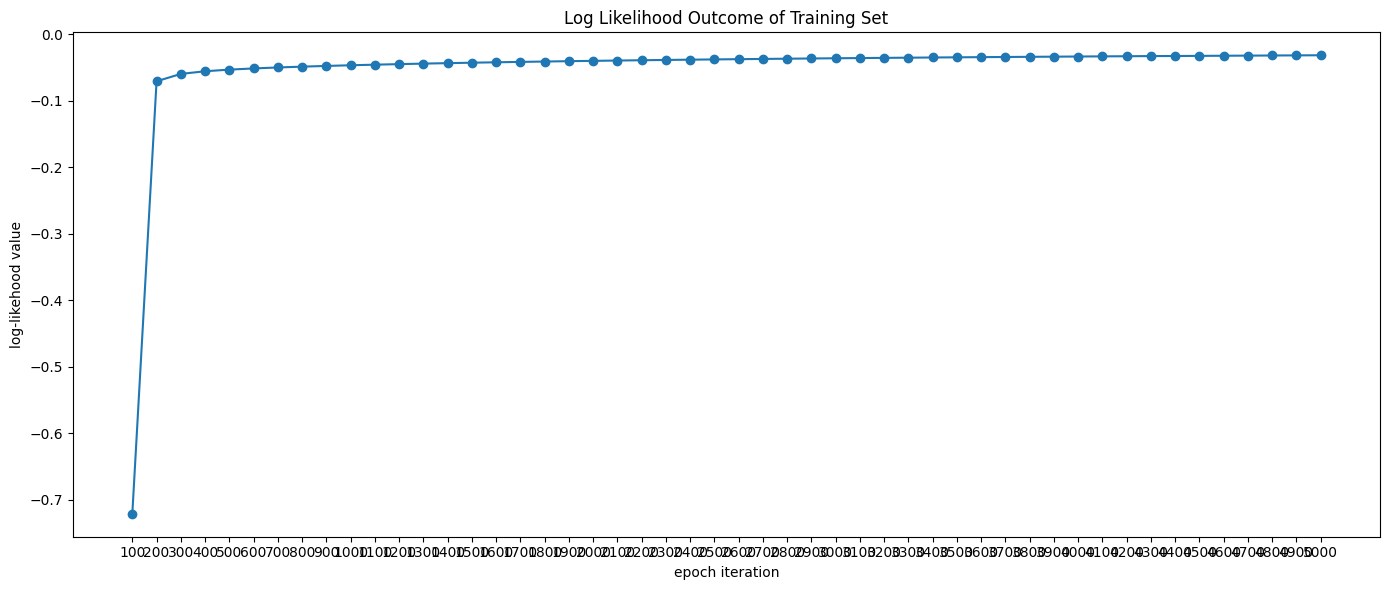

In [31]:
log_likelihood_train = logistic_regression_theta(lr, n_iters, X_train_tr, y_train, X_test_tr, y_test)[1] 
plot_graph('Log Likelihood Outcome of Training Set', n_iters, log_likelihood_train)

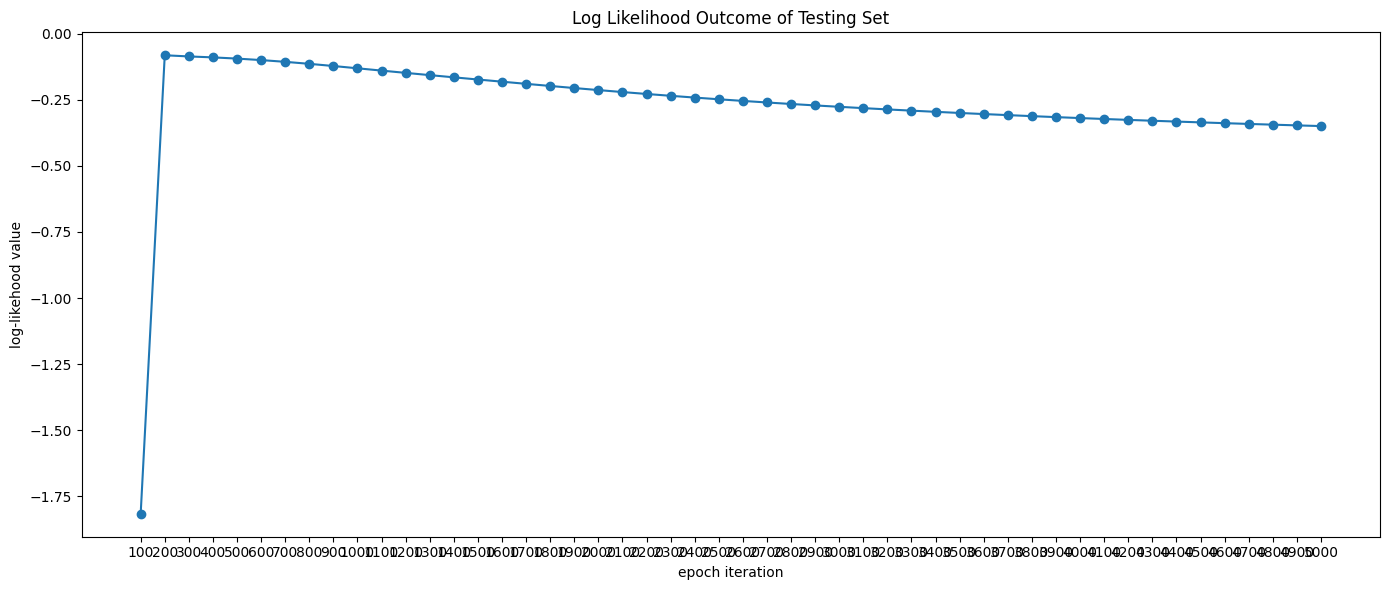

In [32]:
log_likelihood_test = logistic_regression_theta(lr, n_iters, X_train_tr, y_train, X_test_tr, y_test)[2] 
plot_graph('Log Likelihood Outcome of Testing Set', n_iters, log_likelihood_test)

#### Best Parameters

In [45]:
#ignore warning
np.seterr(divide = 'ignore')

#initial hyperparameters
threshold_v = 0.4                                # if the value goes above this then class 1, if below then class 2
lr_v = 0.5                                       # learning rate
n_iters_v = 500                                 # number of iterations

model_theta_validate = logistic_regression_theta(lr_v, n_iters_v, X_train_tr, y_train, X_test_tr, y_test)[0]   #send the X_train and y_train

In [46]:
predicted_values_validate = predict_y_value(X_test_tr, model_theta_validate, threshold_v)
print("The predicted values of y_test:", predicted_values_validate)

The predicted values of y_test: [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]


In [47]:
cf = np.array(confusion_matrix(y_test, predicted_values_validate))
print("Confusion Matrix:\n", cf)

Precision: 0.9733333333333334
Recall: 0.9733333333333334
F-Measure: 0.9733333333333334
Confusion Matrix:
 [[37  2]
 [ 2 73]]


The best parameters are:
- Threshold = 0.4
- Number of Iterations = 500
- Learning Rate = 0.5

The metric value enhance when we use the values above